## 08. PyTorch Model Deployment

- https://github.com/mrdbourke/pytorch-deep-learning/blob/main/09_pytorch_model_deployment.ipynb

we're going to deploy our FoodVision Mini model to the internet as a usable app!

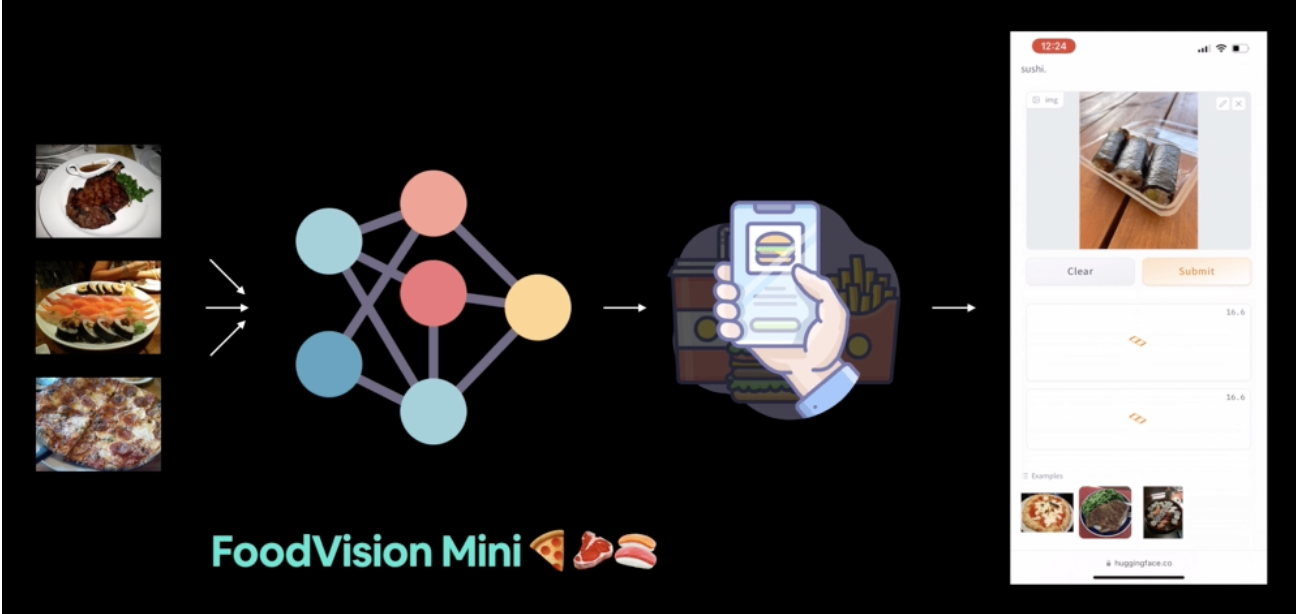

### Different types of machine learning model deployment

머신 러닝 모델 배포의 다양한 유형에 대해 책 한 권을 쓸 수도 있습니다(PyTorch 추가 리소스에 좋은 책이 많이 나와 있습니다).  

그리고 이 분야는 여전히 발전하고 있습니다.  

하지만 저는 질문부터 시작하고 싶습니다:  

"머신 러닝 모델을 사용하기에 가장 이상적인 시나리오는 무엇일까?"라는 질문으로 시작합니다.  

그런 다음 거기서부터 거꾸로 작업합니다.  

물론 미리 알 수 없을 수도 있습니다.  
하지만 여러분은 그런 것들을 상상할 수 있을 만큼 똑똑합니다.   

푸드비전 미니의 경우 이상적인 시나리오는 다음과 같습니다:

- 누군가 모바일 기기(앱 또는 웹 브라우저를 통해)에서 사진을 찍습니다.
- 예측 결과가 빠르게 나옵니다.
간단합니다.

따라서 두 가지 주요 기준이 있습니다:

1. 모델이 모바일 장치에서 작동해야 합니다(즉, 컴퓨팅 제약이 있을 수 있습니다).  
2. 모델이 예측을 빠르게 수행해야 합니다(느린 앱은 지루한 앱이므로).  
물론 사용 사례에 따라 요구 사항이 다를 수 있습니다.

위의 두 가지 요점을 다른 두 가지 질문으로 세분화할 수 있습니다:

1. 어디로 갈 것인가? - 즉, 어디에 저장할 것인가?  
2. 어떻게 작동할 것인가? - 즉, 예측 결과를 즉시 반환하나요? 아니면 나중에 제공되나요?  

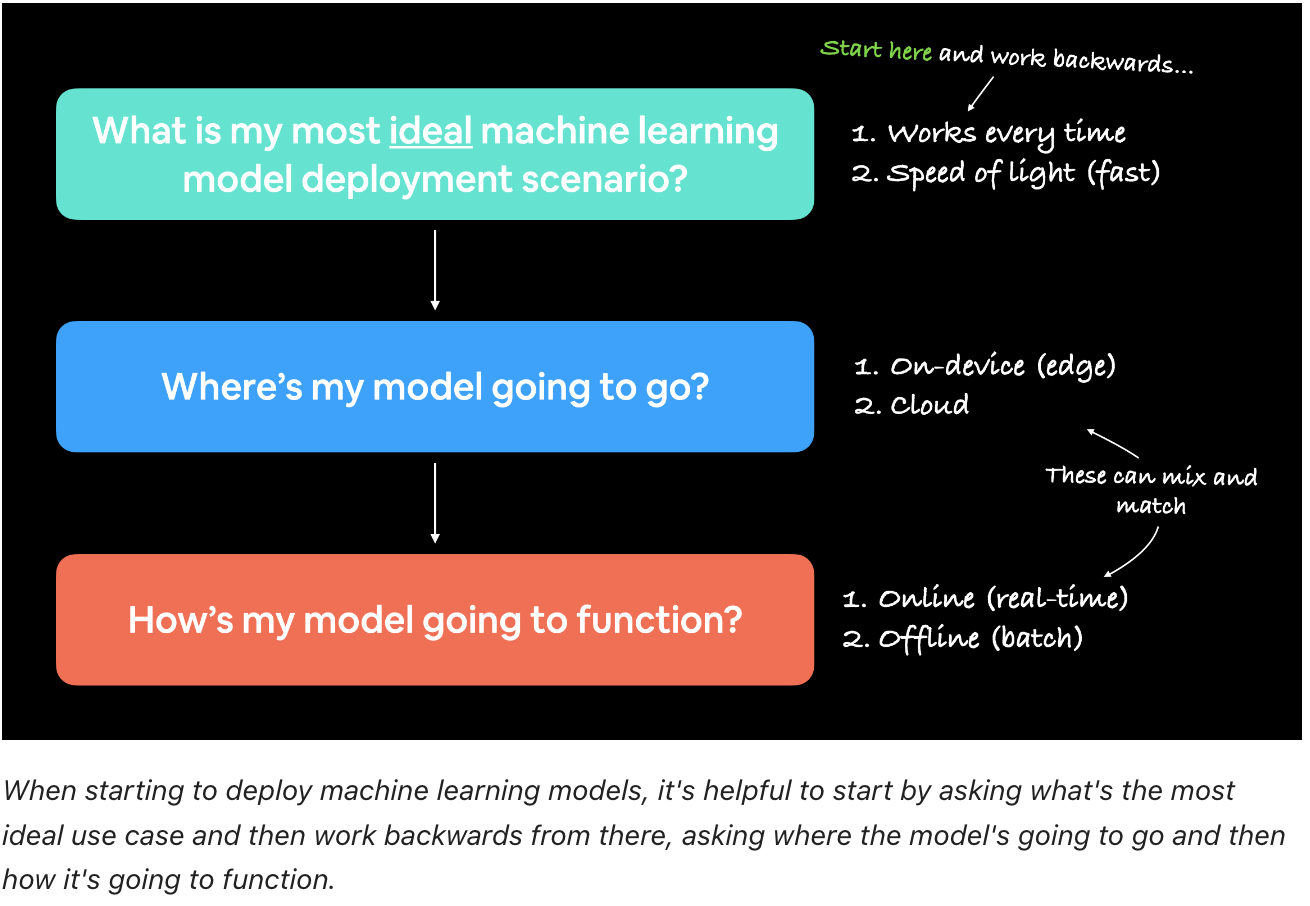

Where's it going to go?


머신 러닝 모델을 배포할 때 어디에 위치하나요?

일반적으로 온디바이스(엣지/브라우저 내라고도 함) 또는 클라우드(누군가/무엇이 모델을 호출하는 실제 디바이스가 아닌 컴퓨터/서버)가 주요 논쟁거리입니다.

둘 다 장단점이 있습니다.

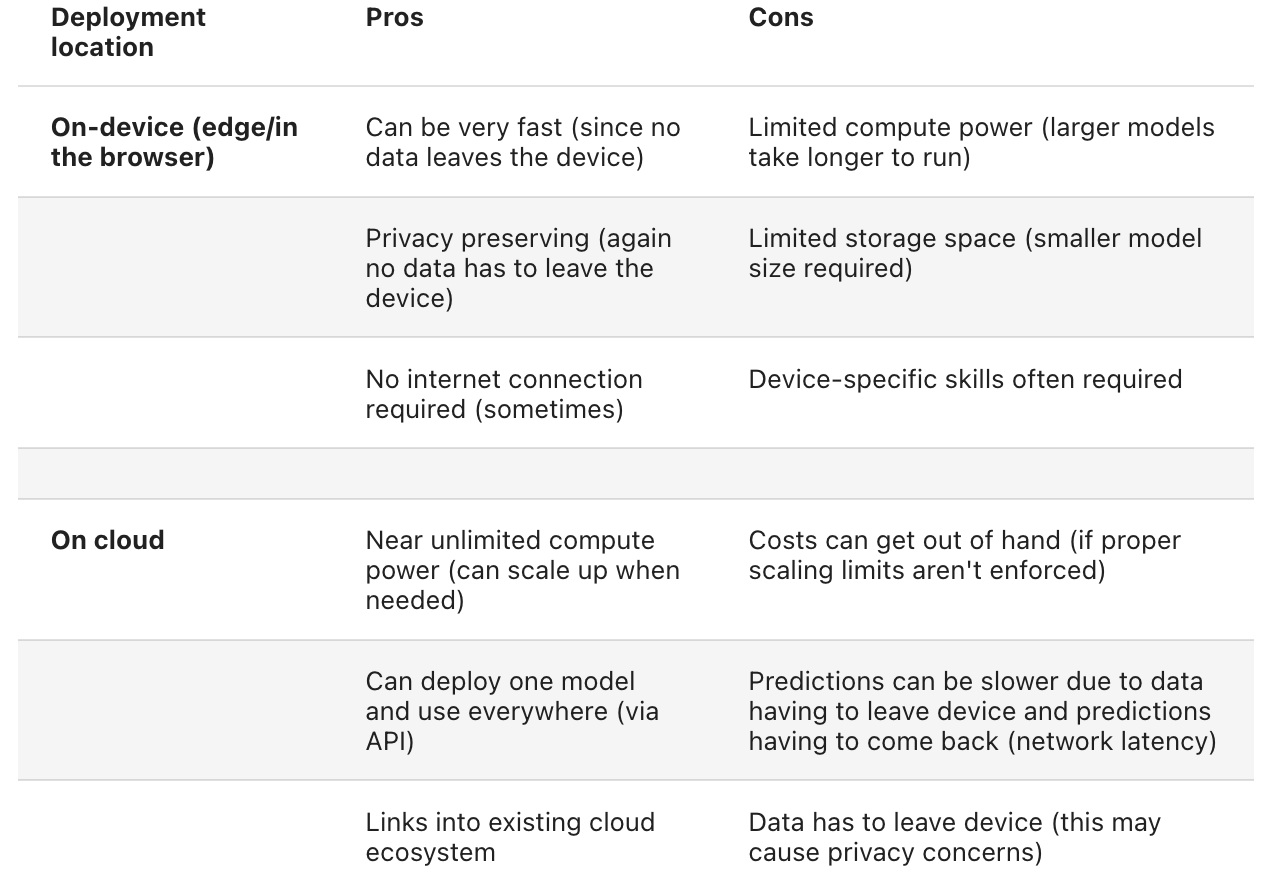

더 자세한 내용은 추가 커리큘럼에 리소스를 남겨 두었으니 참고하시기 바랍니다.  

예를 들어 보겠습니다.  

FoodVision Mini를 앱으로 배포하는 경우 성능이 우수하고 빠르기를 원합니다.  

그렇다면 어떤 모델을 선호할까요?  

- 예측당 1초의 추론 시간(지연 시간)으로 95%의 정확도로 작동하는 온디바이스 모델.
- 예측당 10초의 추론 시간으로 98%의 정확도로 작동하는 클라우드 모델(더 크고 더 나은 모델이지만 계산하는 데 더 오래 걸림).
이 수치는 제가 만들어낸 것이지만, 온디바이스와 클라우드의 잠재적인 차이를 보여줍니다.  

옵션 1은 모바일 디바이스에 적합하기 때문에 더 작고 성능이 낮지만 빠르게 실행되는 모델일 수 있습니다.  

옵션 2는 더 많은 컴퓨팅과 스토리지가 필요한 더 큰 고성능 모델일 수 있지만, 디바이스에서 데이터를 전송하고 다시 가져와야 하기 때문에 실행 시간이 조금 더 오래 걸립니다(따라서 실제 예측은 빠를지라도 네트워크 시간과 데이터 전송을 고려해야 합니다).  

FoodVision Mini의 경우, 성능의 작은 타격이 빠른 추론 속도보다 훨씬 크기 때문에 옵션 1을 선호할 것입니다.  

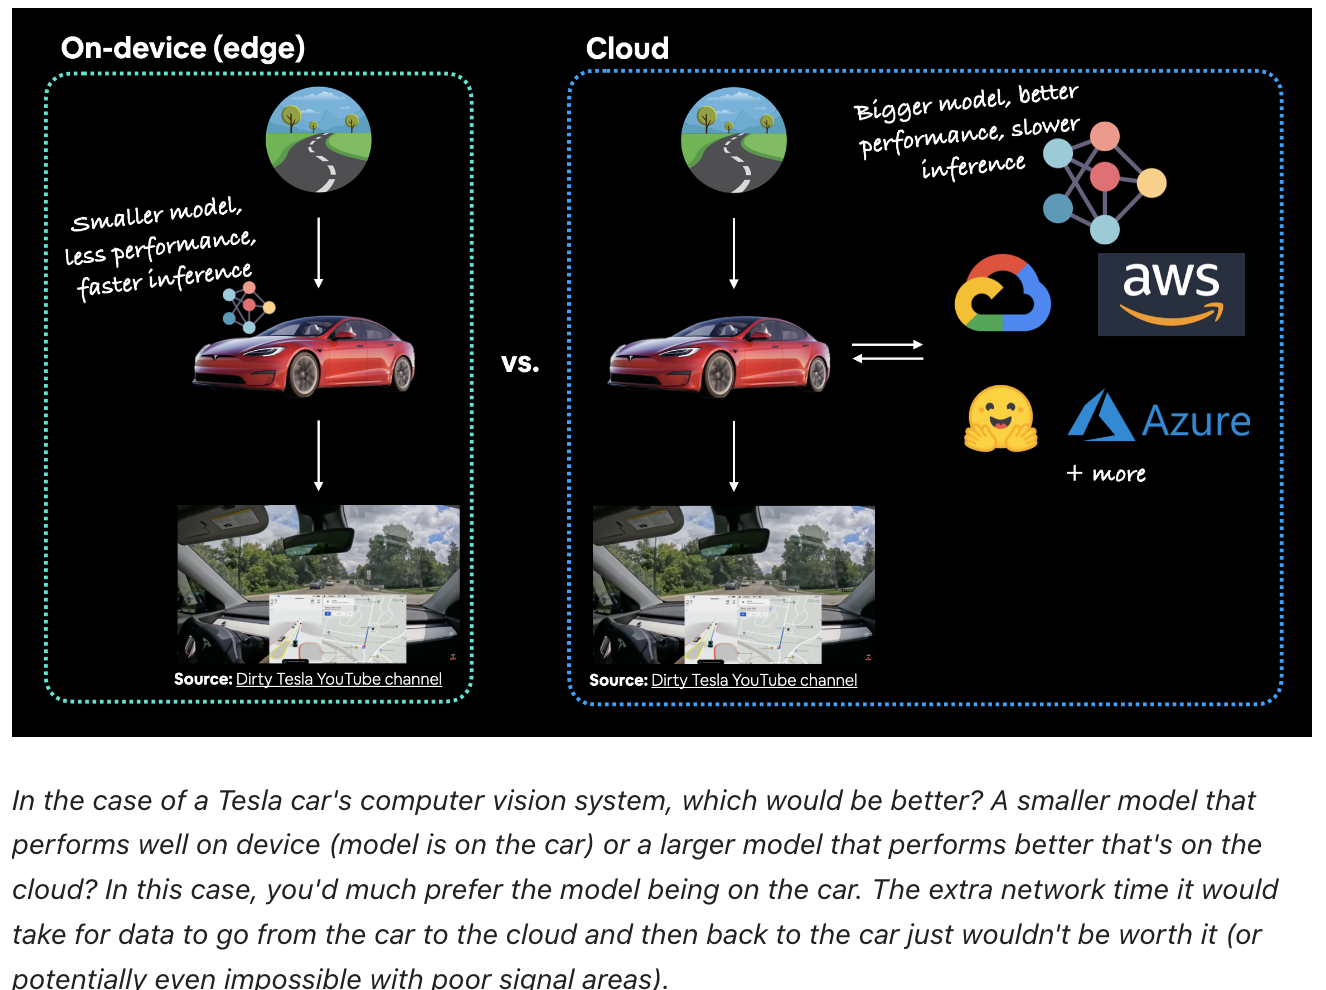

How's it going to function?

머신 러닝 모델을 배포할 때 어떻게 작동해야 할까요?

즉, 예측 결과를 즉시 리턴하길 원하시나요?
아니면 나중에 해도 괜찮을까요?

이 두 가지 시나리오를 일반적으로 다음과 같이 부릅니다:

- 온라인(실시간) : 예측/추론이 즉시 이루어집니다. 예를 들어, 누군가 이미지를 업로드하면 이미지가 변형되어 예측이 반환되거나, 누군가 구매를 하면 모델이 해당 거래가 이상 거래가 아닌 것으로 확인하여 구매가 진행됩니다.
- 오프라인(배치) : 예측/추론이 주기적으로 발생합니다. 예를 들어, 사진 애플리케이션은 모바일 디바이스가 충전되어 있는 동안 이미지를 다양한 카테고리(예: 해변, 식사 시간, 가족, 친구)로 분류합니다.

참고: "배치"는 한 번에 여러 샘플에 대해 추론이 수행되는 것을 의미합니다. 그러나 약간의 혼란을 더하기 위해 배치 처리는 즉시/온라인(여러 이미지를 한 번에 분류) 및/또는 오프라인(여러 이미지를 한 번에 예측/학습)으로 수행될 수 있습니다

각각의 주요 차이점은 예측이 즉시 또는 주기적으로 수행된다는 점입니다.  

주기적으로도 몇 초마다부터 몇 시간 또는 며칠마다까지 다양한 시간 척도를 가질 수 있습니다.  

그리고 이 두 가지를 혼합하여 사용할 수도 있습니다.  

FoodVision Mini의 경우, 추론 파이프라인이 온라인(실시간)으로 이루어지므로 누군가 피자, 스테이크, 스시 이미지를 업로드하면 예측 결과가 즉시 반환됩니다(실시간보다 느리면 지루한 경험이 될 수 있습니다).

그러나 학습 파이프라인의 경우, 이전 챕터에서 수행했던 것처럼 일괄 처리(오프라인) 방식으로 진행해도 괜찮습니다.  

Ways to deploy a machine learning model

머신 러닝 모델을 배포하기 위한 몇 가지 옵션(온디바이스 및 클라우드)에 대해 설명했습니다.  

그리고 각각의 옵션에는 고유한 요구 사항이 있습니다:

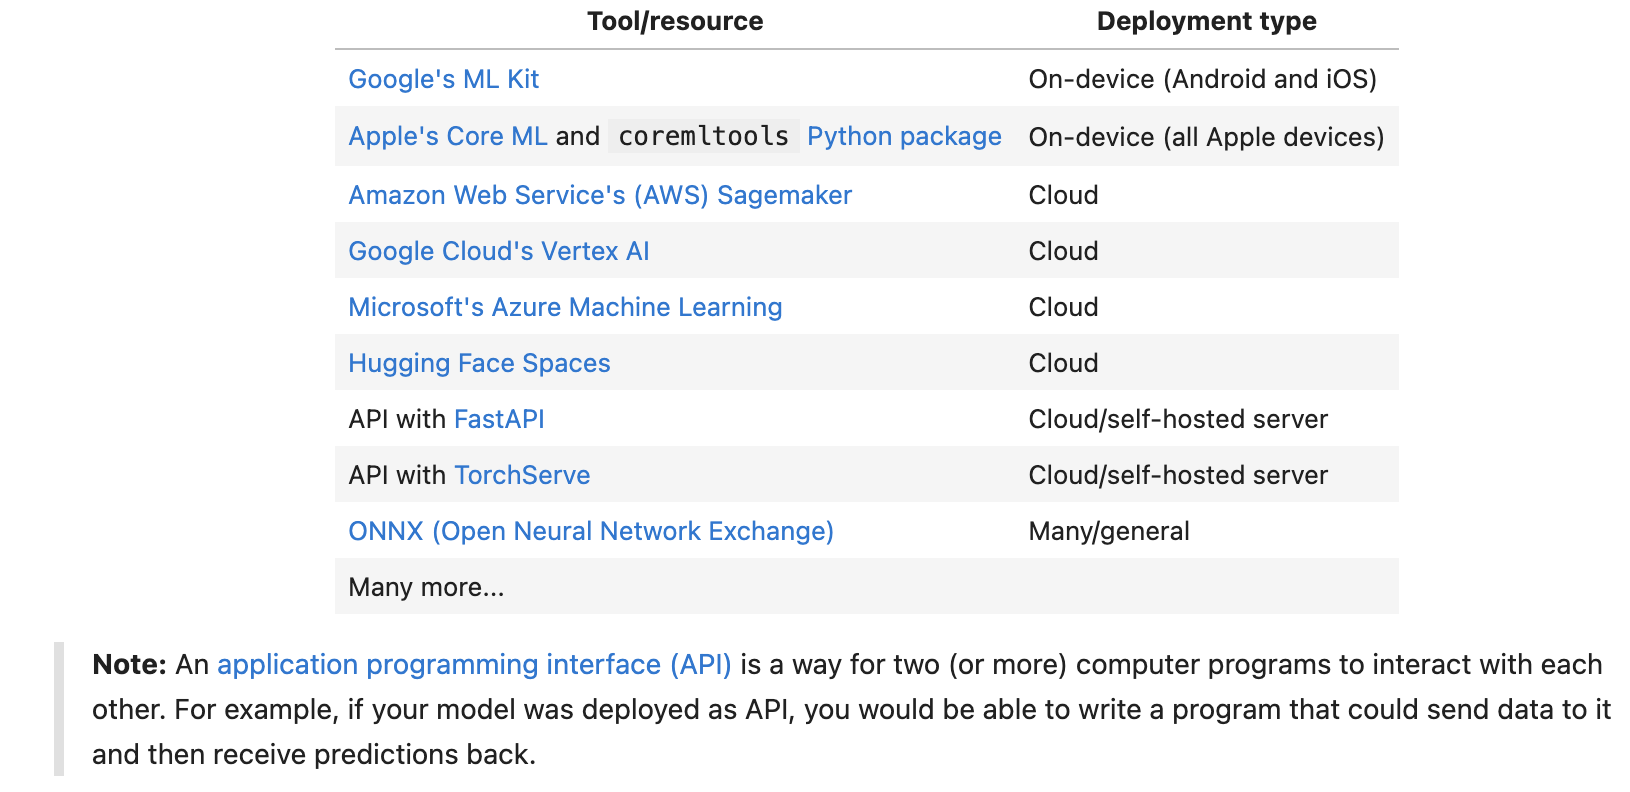

어떤 옵션을 선택하느냐는 무엇을 만들고 누구와 함께 작업하느냐에 따라 크게 달라집니다.

하지만 옵션이 너무 많으면 매우 부담스러울 수 있습니다.

따라서 작게 시작하여 단순하게 유지하는 것이 가장 좋습니다.

가장 좋은 방법 중 하나는 Gradio를 사용하여 머신 러닝 모델을 데모 앱으로 전환한 다음 Hugging Face Spaces에 배포하는 것입니다.

나중에 푸드비전 미니를 통해 바로 그렇게 할 것입니다.

### What we're going to cover

머신 러닝 모델 배포에 대한 이야기는 충분합니다.  

이제 머신 러닝 엔지니어가 되어 실제로 배포해 보겠습니다.  

우리의 목표는 다음과 같은 메트릭을 사용하여 데모 Gradio 앱을 통해 FoodVision 모델을 배포하는 것입니다:  

1. 성능: 95% 이상의 정확도.  
2. 속도: 30FPS 이상의 실시간 추론(각 예측의 지연 시간은 ~0.03초 미만).  

지금까지 가장 우수한 두 모델을 비교하기 위해 실험을 실행하는 것으로 시작하겠습니다: EffNetB2와 ViT 특징 추출기입니다.  

그런 다음 목표 지표에 가장 근접한 성능을 보이는 모델을 배포할 것입니다.  

마지막으로 깜짝 보너스로 마무리하겠습니다.  

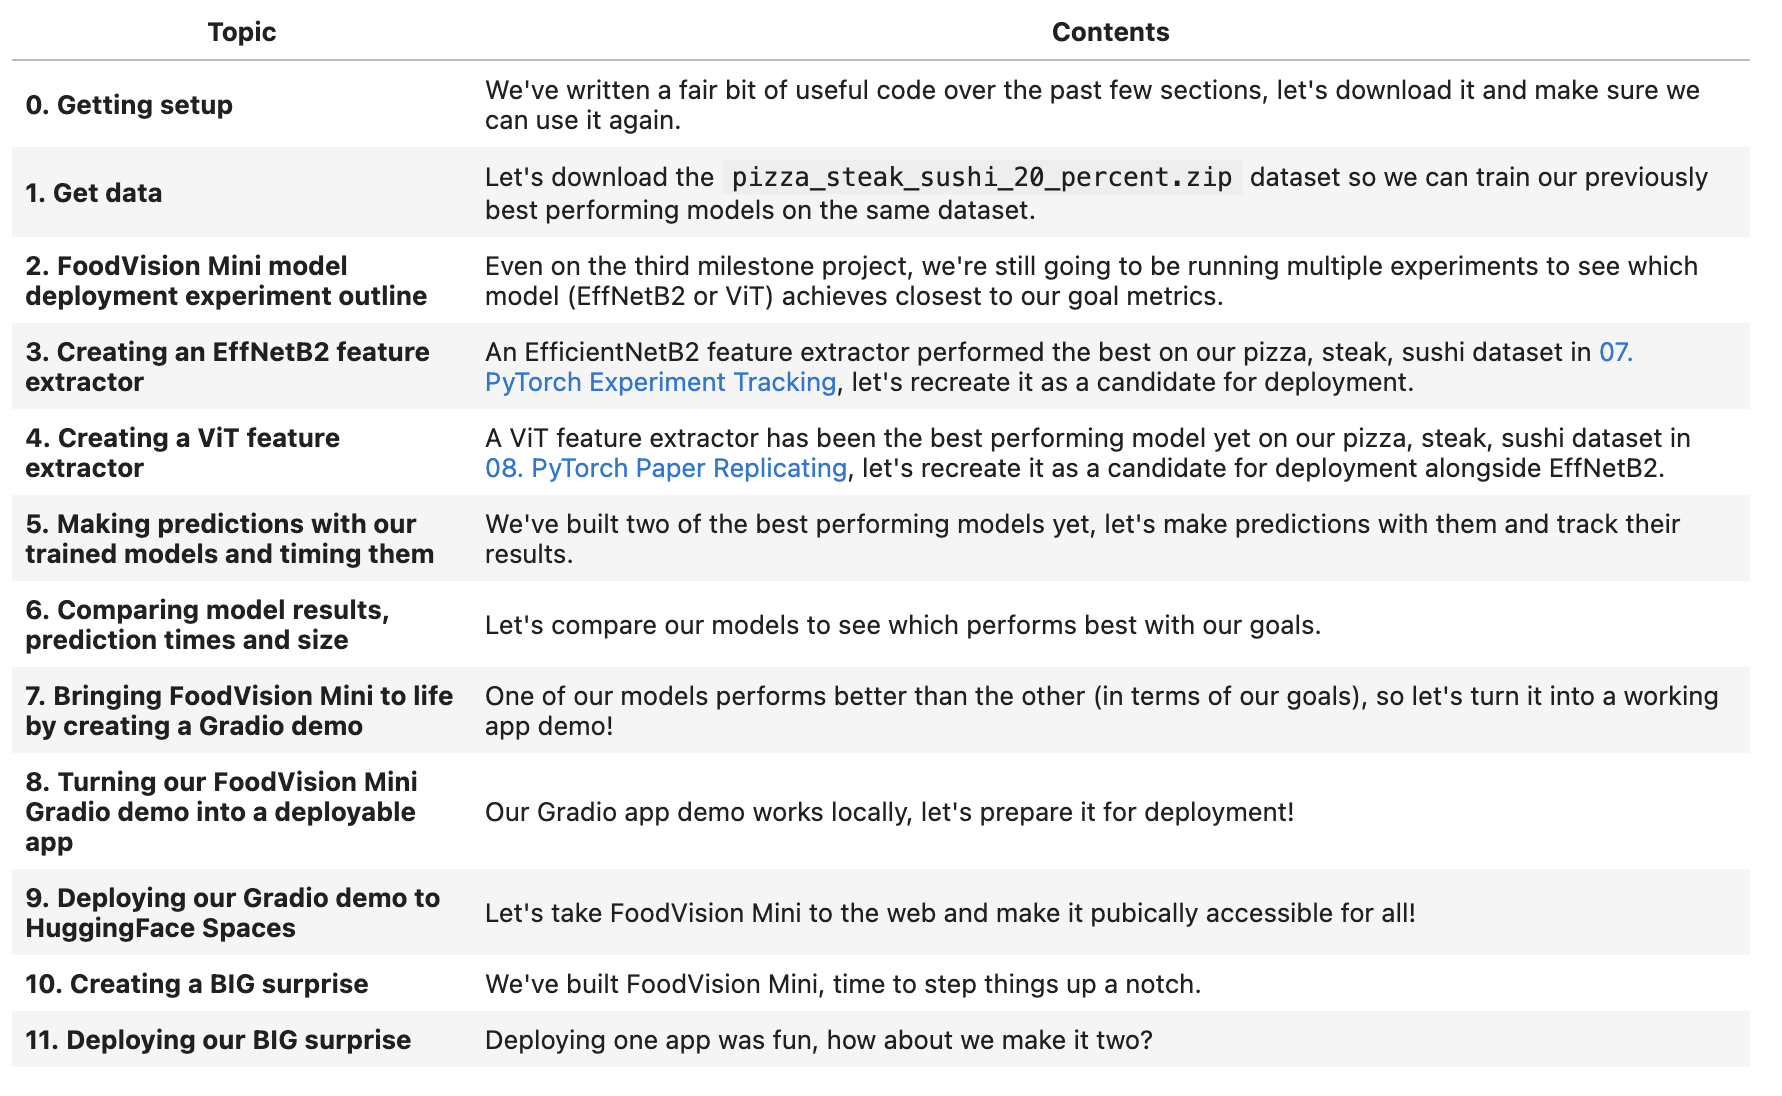

### 0. Getting setup

이전에 했던 것처럼 이 섹션에 필요한 모든 모듈이 준비되었는지 확인하겠습니다.

05년에 만든 Python 스크립트(예: data_setup.py 및 engine.py)를 가져올 것입니다. 파이토치 모듈화.

이를 위해 파이토치 딥러닝 리포지토리에서 going_modular 디렉터리를 다운로드합니다(아직 다운로드하지 않은 경우).

또한 사용할 수 없는 경우 torchinfo 패키지도 다운로드합니다.

나중에 모델을 시각적으로 표현하는 데 도움이 될 것입니다.

그리고 나중에는 토치비전 v0.13 패키지(2022년 7월부터 사용 가능)를 사용할 예정이므로 최신 버전을 확보할 수 있도록 할 것입니다.

In [1]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
torch version: 2.1.0
torchvision version: 0.16.0


In [2]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

from torchinfo import summary

from going_modular import data_setup, engine
from helper_functions import download_data, set_seeds, plot_loss_curves

/Users/sguys99/anaconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 1. Getting data

우리의 목표는 FoodVision Mini 문제에 가장 적합한 모델을 배포하는 것이므로, 
먼저 20%의 피자, 스테이크, 스시 데이터 세트를 다운로드하여 
EffNetB2 피처 추출기와 ViT 특징 추출기를 훈련한 다음 두 모델을 비교해 보겠습니다.

이렇게 하면 사과와 사과를 비교하게 됩니다(한 데이터 세트에서 학습된 모델과 동일한 데이터 세트에서 학습된 다른 모델을 비교).

참고: 다운로드하는 데이터 세트는 전체 Food101 데이터 세트(각각 1,000개의 이미지가 포함된 101개의 음식 클래스)의 샘플입니다. 구체적으로 20%는 피자, 스테이크, 스시 클래스에서 무작위로 선택된 이미지의 20%를 의미합니다. 이 데이터 세트가 어떻게 생성되었는지는 extras/04_custom_data_creation.ipynb에서 확인할 수 있으며, 자세한 내용은 04에서 확인할 수 있습니다. PyTorch 사용자 정의 데이터 세트 섹션 1을 참조하세요.

In [4]:
# Download pizza, steak, sushi images from GitHub
data_20_percent_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                                     destination="pizza_steak_sushi_20_percent")

data_20_percent_path

[INFO] data/pizza_steak_sushi_20_percent directory exists, skipping download.


PosixPath('data/pizza_steak_sushi_20_percent')

In [5]:
train_dir = data_20_percent_path / "train"
test_dir = data_20_percent_path / "test"

### 2. FoodVision Mini model deployment experiment outline

가장 이상적으로 배포된 모델인 FoodVision Mini는 성능이 우수하고 빠릅니다.  

우리는 모델이 가능한 한 실시간에 가깝게 작동하기를 원합니다.  

이 경우 실시간이란 사람의 눈이 볼 수 있는 속도와 비슷하기 때문에 ~30FPS(초당 프레임 수)를 의미합니다(이에 대한 논쟁이 있지만 ~30FPS를 벤치마크로 사용하기로 하겠습니다).  

그리고 피자, 스테이크, 초밥의 세 가지 클래스를 분류할 때 95% 이상의 정확도로 작동하는 모델을 원합니다.  

물론 정확도가 높으면 좋겠지만 그렇게 되면 속도가 저하될 수 있습니다.  

그래서 우리의 목표는 다음과 같습니다:  

- 성능 - 95% 이상의 정확도로 작동하는 모델.
- 속도 - ~30FPS(이미지당 0.03초의 추론 시간, 지연 시간이라고도 함)로 이미지를 분류할 수 있는 모델.

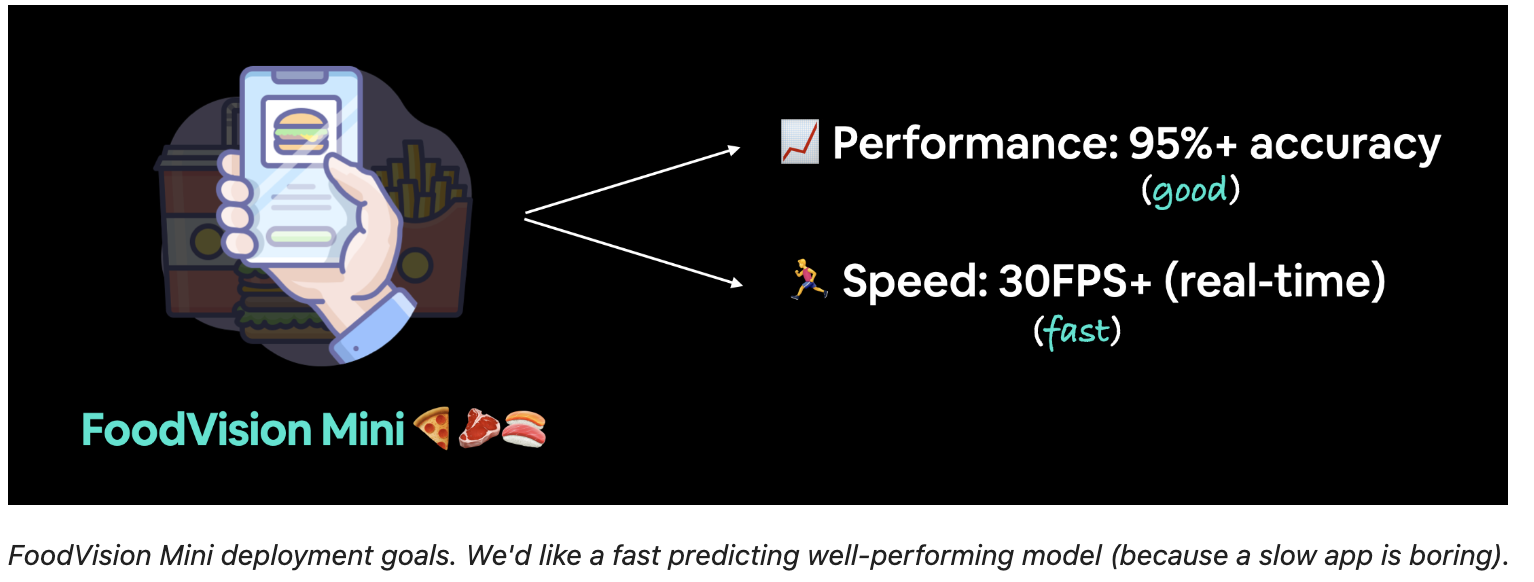

여기서는 속도에 중점을 두겠습니다.   
즉, 10FPS에서 95% 이상의 정확도를 보이는 모델보다 ~30FPS에서 90% 이상의 정확도를 보이는 모델을 선호합니다.

이러한 결과를 얻기 위해 이전 섹션에서 가장 성능이 좋은 모델을 가져와 보겠습니다:

- EffNetB2 특징 추출기(줄여서 EffNetB2)입니다.- 07에서 만든것. 분류기 레이어가 조정된 torchvision.models.efficientnet_b2()를 사용한 PyTorch 실험 추적 섹션 7.5.
- ViT-B/16 특징 추출기(줄여서 ViT) - 08에서 만들어졌습니다. PyTorch 논문 섹션 10을 조정된 헤드 레이어와 함께 torchvision.models.vit_b_16()을 사용하여 복제합니다.  
참고 ViT-B/16은 "비전 트랜스포머 베이스, 패치 크기 16"의 약자입니다.

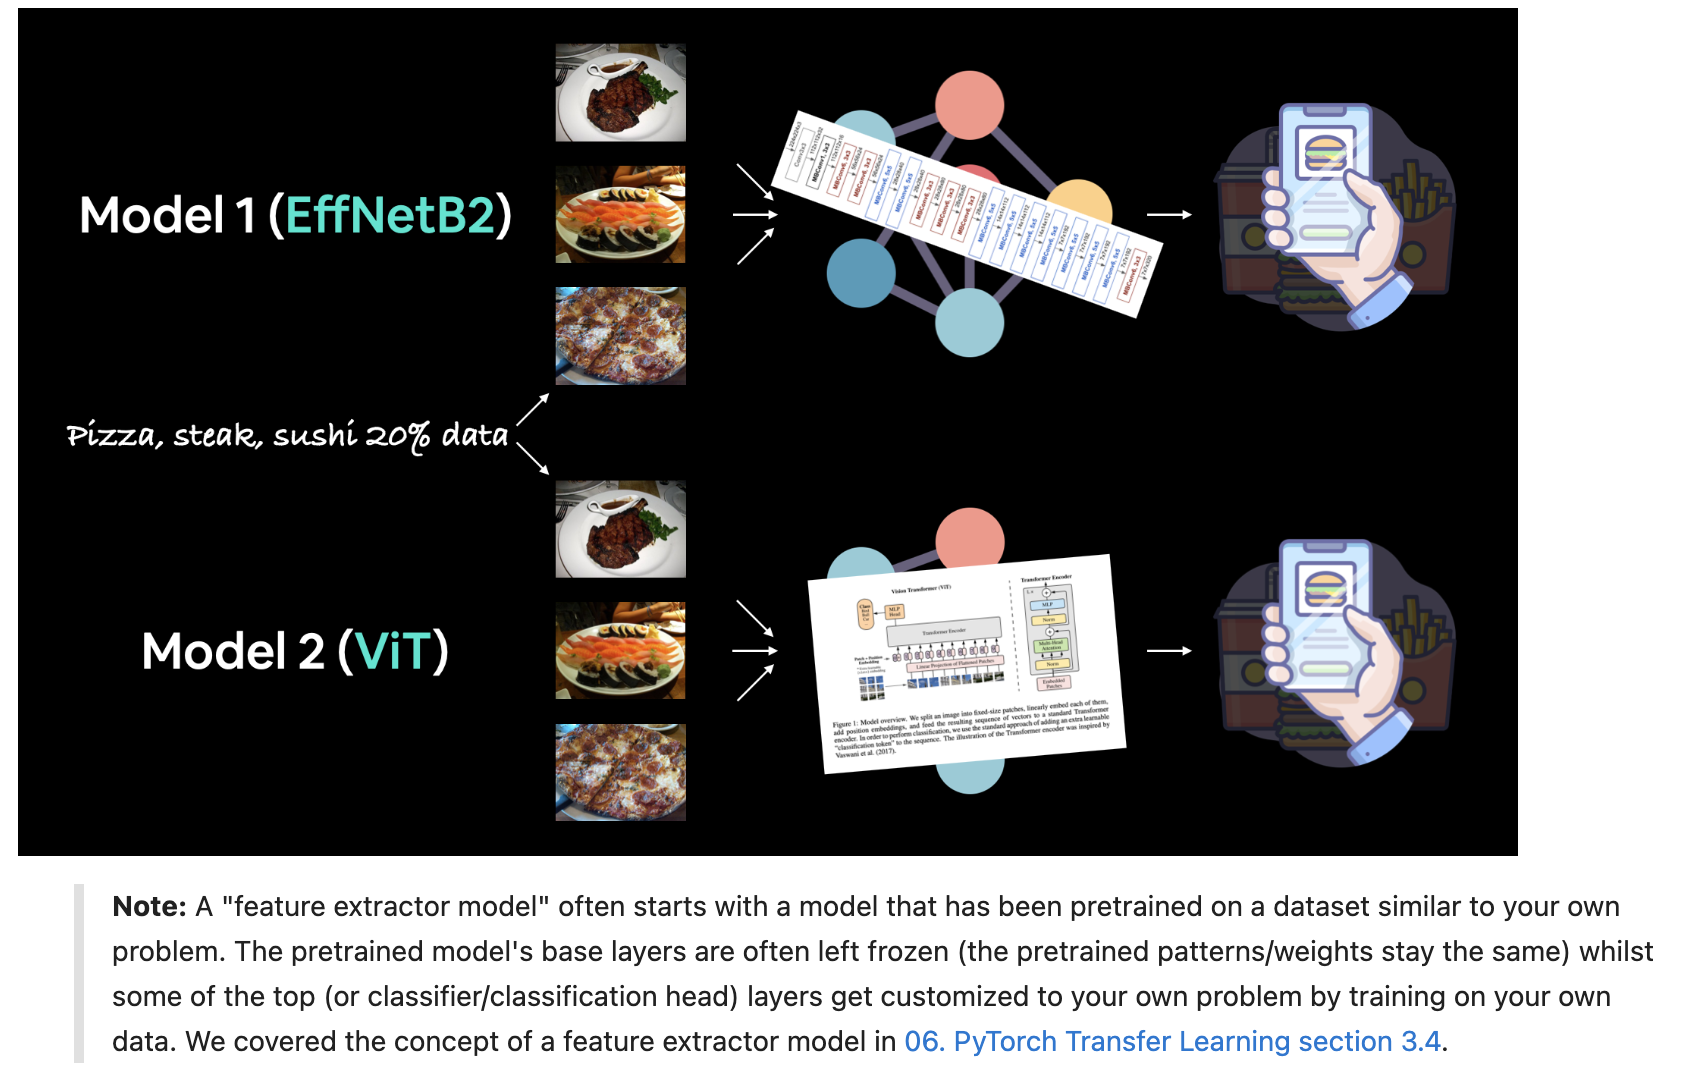

### 3. Creating an EffNetB2 feature extractor

저희는 07년에 EffNetB2 특징 추출기 모델을 처음 만들었습니다. PyTorch 실험 추적 섹션 7.5.  

이 섹션이 끝날 무렵에는 매우 우수한 성능을 보였습니다.  

이제 동일한 데이터로 훈련된 ViT 특징 추출기와 그 결과를 비교할 수 있도록 여기에서 다시 만들어 보겠습니다.  

그렇게 하려면 다음과 같이 하세요:  

1) 사전 학습된 가중치를 weights=torchvision.models.EfficientNet_B2_Weights.DEFAULT로 설정합니다. 여기서 "DEFAULT"는 "현재 사용 가능한 최상의 값"을 의미합니다(또는 weights="DEFAULT"를 사용할 수 있음).

2) transforms() 메서드를 사용하여 가중치에서 사전 학습된 모델 이미지 트랜스폼을 가져옵니다(사전 학습된 EffNetB2가 학습된 것과 동일한 형식으로 이미지를 변환할 수 있도록 하기 위해 필요합니다).

3) 가중치를 torchvision.models.efficientnet_b2 인스턴스에 전달하여 사전 훈련된 모델 인스턴스를 생성합니다.

4) 모델의 기본 레이어를 고정합니다.

5) 자체 데이터에 맞게 분류기 헤드를 업데이트합니다.

In [6]:
# 1. pretrained EffNetB2 가중치 사용
effnetb2_weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT

# 2. Get EffNetB2 transforms
effnetb2_transforms = effnetb2_weights.transforms()

# 3. Setup pretrained model
effnetb2 = torchvision.models.efficientnet_b2(weights=effnetb2_weights)

# 4. Freeze the base layers in the model
for param in effnetb2.parameters():
    param.requires_grad = False

In [7]:
effnetb2.classifier

Sequential(
  (0): Dropout(p=0.3, inplace=True)
  (1): Linear(in_features=1408, out_features=1000, bias=True)
)

훌륭합니다! 
우리 문제에 맞게 분류기 헤드를 변경하려면 out_features 변수를 가지고 있는 클래스 수와 동일한 수로 바꾸어 보겠습니다
(이 경우, 피자, 스테이크, 초밥에 대해 각각 하나씩, out_features=3).

참고: 출력 레이어/분류기 헤드를 변경하는 이 프로세스는 작업 중인 문제에 따라 달라집니다.  
예를 들어, 다른 개수의 출력이나 다른 종류의 출력을 원한다면 그에 따라 출력 레이어를 변경해야 합니다.

In [8]:
# 5. Update the classifier head
effnetb2.classifier = nn.Sequential(
    nn.Dropout(p= 0.3, inplace=True),
    nn.Linear(in_features=1408,
              out_features = 3)
)

3.1 Creating a function to make an EffNetB2 feature extractor

EffNetB2 특징 추출기를 사용할 준비가 된 것 같지만, 여기에는 꽤 많은 단계가 포함되어 있으므로 위의 코드를 나중에 재사용할 수 있는 함수로 바꾸는 것은 어떨까요?  

이 함수를 create_effnetb2_model()이라고 부르고 재현성을 위해 사용자 정의 가능한 클래스 수와 임의의 시드 매개변수를 사용할 것입니다.  

이 함수는 연관된 트랜스폼과 함께 EffNetB2 특징 추출기를 반환하는 것이 이상적입니다.  

In [9]:
def create_effnetb2_model(num_classes:int=3, 
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head. 
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model. 
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # 1, 2, 3. Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    # 4. Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # 5. Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )
    
    return model, transforms

In [10]:
effnetb2, effnetb2_transforms = create_effnetb2_model(num_classes=3,
                                                      seed=42)

In [11]:
from torchinfo import summary

# Print EffNetB2 model summary (uncomment for full output) 
summary(effnetb2, 
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 3]               --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1408, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

3.2 Creating DataLoaders for EffNetB2

EffNetB2 특징 추출기가 준비되었으니 이제 데이터로더를 만들 차례입니다.  

05에서 만든 data_setup.create_dataloaders() 함수를 사용하여 이를 수행할 수 있습니다.  

배치 크기 32를 사용하고 effnetb2_transforms를 사용하여 이미지를 변환하여 effnetb2 모델이 학습된 것과 동일한 형식이 되도록 하겠습니다.

In [12]:
from going_modular import data_setup

train_dataloader_effnet2, test_dataloader_effnetb2, class_names = data_setup.create_dataloaders(
train_dir=train_dir,
test_dir=test_dir,
transform=effnetb2_transforms,
batch_size=32
)

3.3 Training EffNetB2 feature extractor

In [13]:
from going_modular import engine

optimizer = torch.optim.Adam(params = effnetb2.parameters(),
                             lr = 1e-3
                             )

loss_fn = torch.nn.CrossEntropyLoss()


device = 'mps'

set_seeds()
effnetb2_results = engine.train(
    model = effnetb2,
    train_dataloader=train_dataloader_effnet2,
    test_dataloader=test_dataloader_effnetb2,
    epochs = 10,
    optimizer=optimizer,
    loss_fn=loss_fn,
    device=device
)

 10%|█         | 1/10 [00:06<00:55,  6.20s/it]

Epoch: 1 | train_loss: 0.9817 | train_acc: 0.5729 | test_loss: 0.7343 | test_acc: 0.9625


 20%|██        | 2/10 [00:10<00:41,  5.22s/it]

Epoch: 2 | train_loss: 0.7070 | train_acc: 0.8667 | test_loss: 0.5739 | test_acc: 0.9500


 30%|███       | 3/10 [00:15<00:34,  4.92s/it]

Epoch: 3 | train_loss: 0.6039 | train_acc: 0.8167 | test_loss: 0.4819 | test_acc: 0.9625


 40%|████      | 4/10 [00:19<00:28,  4.83s/it]

Epoch: 4 | train_loss: 0.4490 | train_acc: 0.9021 | test_loss: 0.4318 | test_acc: 0.9375


 50%|█████     | 5/10 [00:24<00:23,  4.75s/it]

Epoch: 5 | train_loss: 0.4287 | train_acc: 0.9104 | test_loss: 0.3894 | test_acc: 0.9472


 60%|██████    | 6/10 [00:29<00:18,  4.70s/it]

Epoch: 6 | train_loss: 0.4202 | train_acc: 0.8833 | test_loss: 0.3528 | test_acc: 0.9688


 70%|███████   | 7/10 [00:33<00:14,  4.72s/it]

Epoch: 7 | train_loss: 0.4224 | train_acc: 0.8396 | test_loss: 0.3256 | test_acc: 0.9472


 80%|████████  | 8/10 [00:38<00:09,  4.70s/it]

Epoch: 8 | train_loss: 0.3951 | train_acc: 0.8875 | test_loss: 0.3461 | test_acc: 0.9472


 90%|█████████ | 9/10 [00:43<00:04,  4.71s/it]

Epoch: 9 | train_loss: 0.3832 | train_acc: 0.8771 | test_loss: 0.3104 | test_acc: 0.9347


100%|██████████| 10/10 [00:48<00:00,  4.81s/it]

Epoch: 10 | train_loss: 0.3655 | train_acc: 0.8604 | test_loss: 0.2837 | test_acc: 0.9625


3.4 Inspecting EffNetB2 loss curves

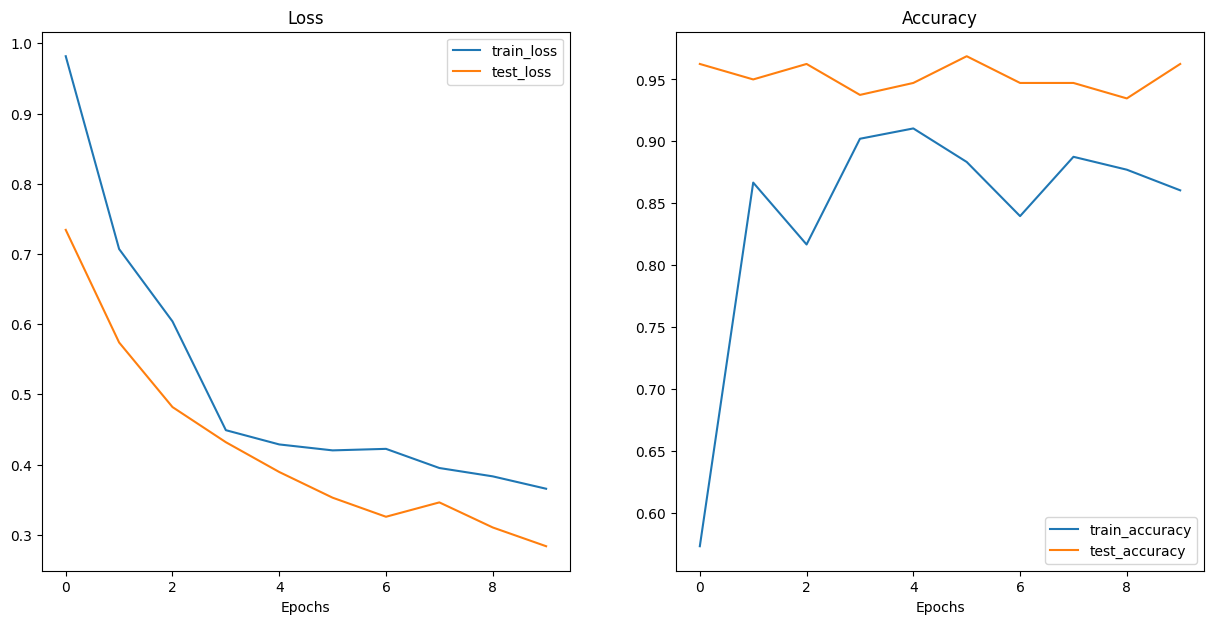

In [14]:
from helper_functions import plot_loss_curves

plot_loss_curves(effnetb2_results)